In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("AmazonSalesData.csv")

In [4]:
print(data['Order Date'].head())

0    5/28/2010
1    8/22/2012
2     5/2/2014
3    6/20/2014
4     2/1/2013
Name: Order Date, dtype: object


In [5]:
data['Order Date']=pd.to_datetime(data['Order Date'],errors='coerce')

In [6]:
data.dropna(subset=['Order Date'],inplace=True)

In [7]:
data['Year']=data['Order Date'].dt.year
data['Month']=data['Order Date'].dt.month
data['Year_Month']=data['Order Date'].dt.to_period('M')

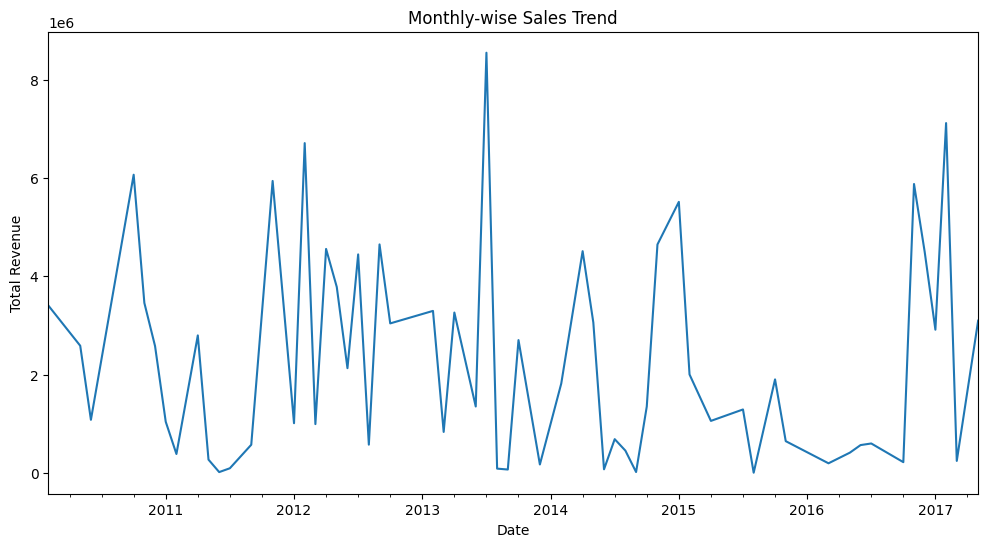

In [8]:
# Monthly Sales Trend
monthly_sales=data.groupby(data['Order Date'].dt.to_period('M'))['Total Revenue'].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Monthly-wise Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

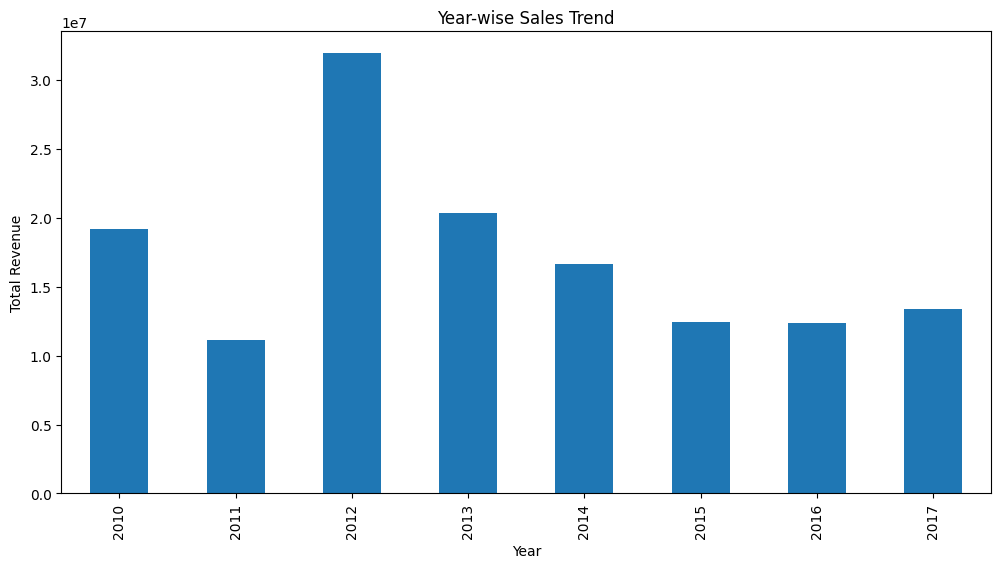

In [9]:
# Yearly Sales Trend
yearly_sales=data.groupby(data['Order Date'].dt.year)['Total Revenue'].sum()
plt.figure(figsize=(12,6))
yearly_sales.plot(kind='bar')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

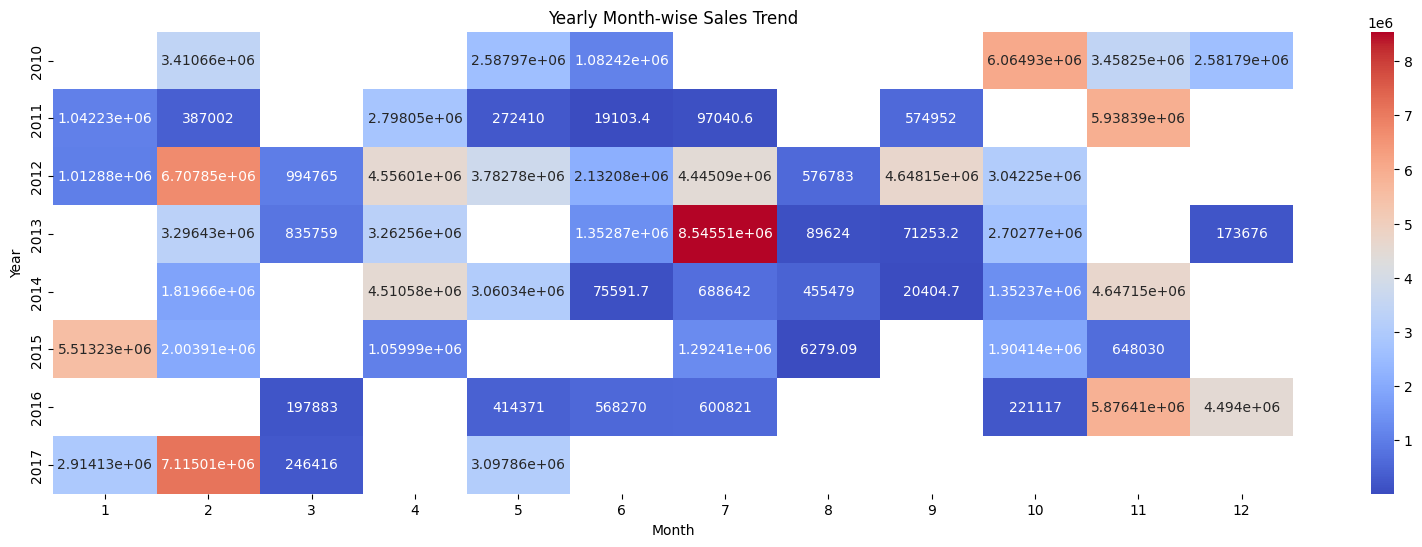

In [10]:
data['Year']=data['Year'].astype(int)
data['Month']=data['Month'].astype(int)
Year_Month_Sales=data.groupby(['Year','Month'])['Total Revenue'].sum().unstack()
plt.figure(figsize=(20,6))
sns.heatmap(Year_Month_Sales,cmap='coolwarm',annot=True,fmt='g')
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [11]:
total_sales=data['Total Revenue'].sum()
average_sales=data['Total Revenue'].mean()
top_products=data.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False).head(10)

In [12]:
print(f'Total Sales: ${total_sales}') #f-string
print(f'Average Sales per Transaction: ${average_sales}')
print('Top 10 Products by Sales: ')
print(top_products)

Total Sales: $137348768.31
Average Sales per Transaction: $1373487.6831
Top 10 Products by Sales: 
Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Name: Total Revenue, dtype: float64


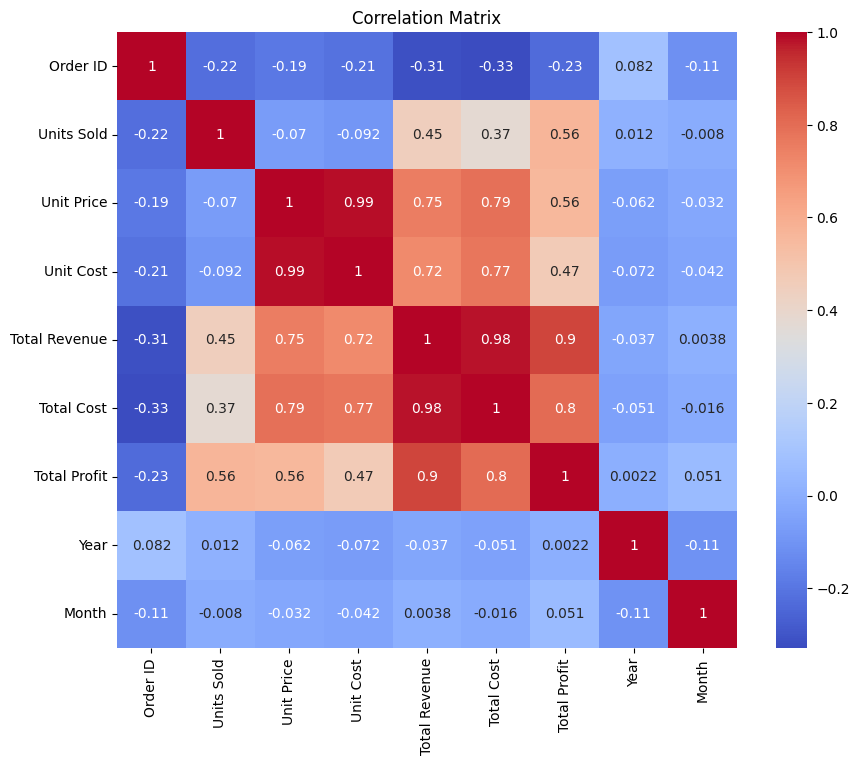

In [13]:
# Selecting only numerical columns for correlation calculation 
numerical_data=data.select_dtypes(include=['number'])

# Finds relation between the different numerical columns
corr_matrix=numerical_data.corr() 
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

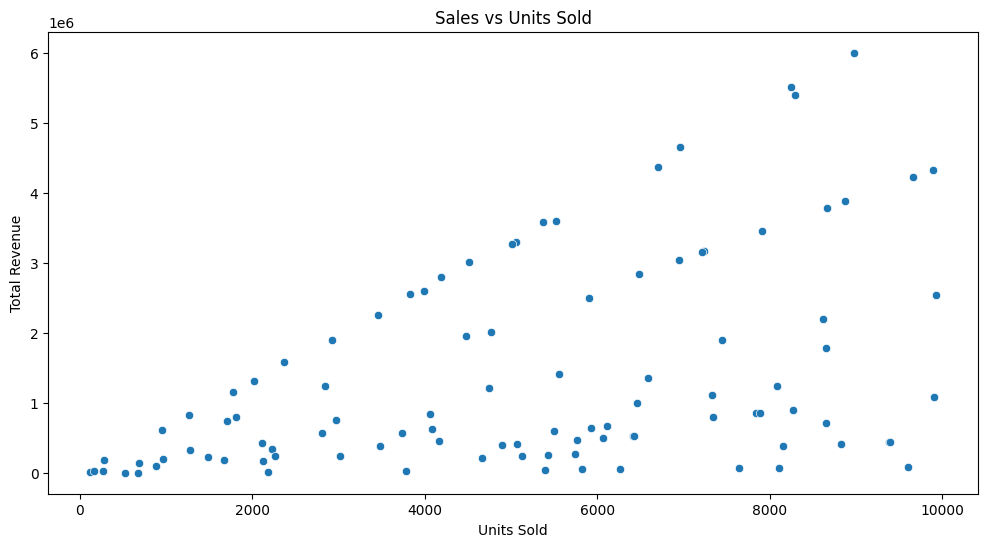

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Units Sold',y='Total Revenue',data=data)
plt.title('Sales vs Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')
plt.show()

In [15]:
data.to_csv('Cleaned_amazon_sales_data.csv',index=False)

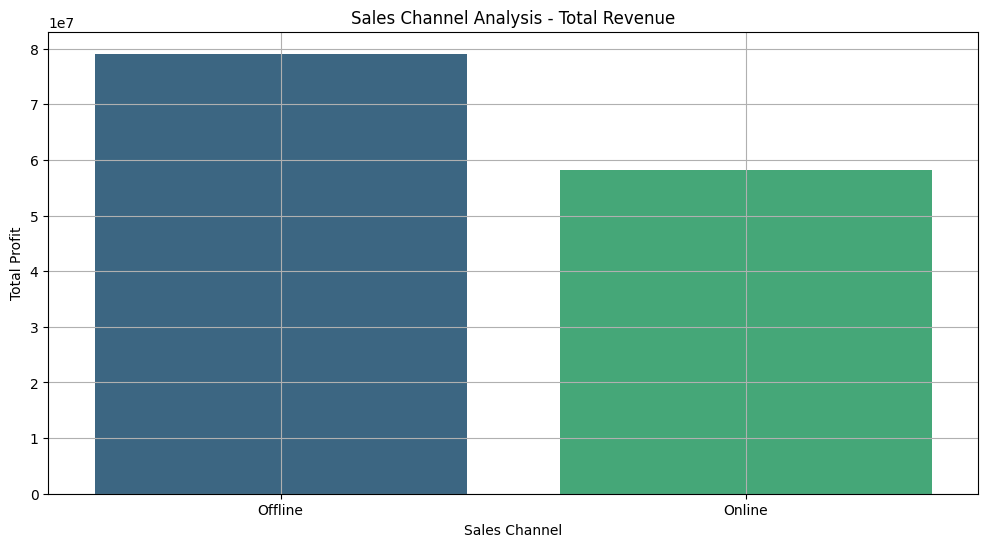

In [16]:
# Group by Sales Channel and calculate total revenue and profit
sales_channel_analysis=data.groupby('Sales Channel')[['Total Revenue','Total Profit']].sum().reset_index()

# Plot Sales Channel Analysis 1
plt.figure(figsize=(12,6))
sns.barplot(data=sales_channel_analysis, x='Sales Channel', y='Total Revenue',hue='Sales Channel',palette='viridis',dodge=False)
plt.title('Sales Channel Analysis - Total Revenue')
plt.xlabel('Sales Channel')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

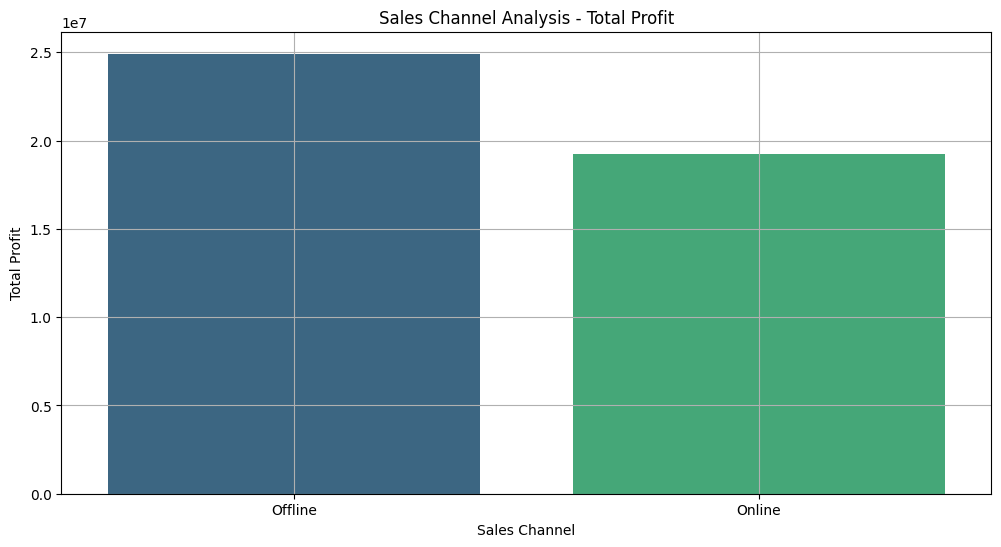

In [19]:
# Plot Sales Channel Analysis 2
plt.figure(figsize=(12,6))
sns.barplot(data=sales_channel_analysis, x='Sales Channel', y='Total Profit',hue='Sales Channel', palette='viridis',dodge=False)
plt.title('Sales Channel Analysis - Total Profit')
plt.xlabel('Sales Channel')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

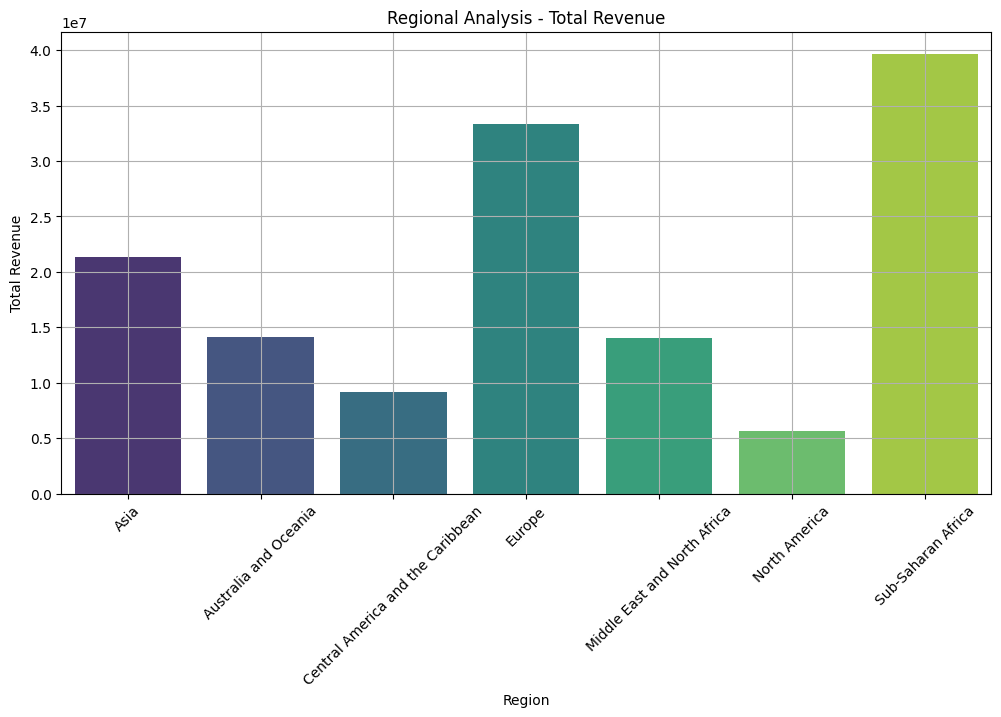

In [21]:
# Group by Region and calculate Total Revenue and Profit
region_analysis=data.groupby('Region')[['Total Revenue','Total Profit']].sum().reset_index()

# Plot Regional Analysis 1
plt.figure(figsize=(12,6))
sns.barplot(data=region_analysis, x='Region', y='Total Revenue', hue='Region', palette='viridis', dodge=False)
plt.title('Regional Analysis - Total Revenue')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

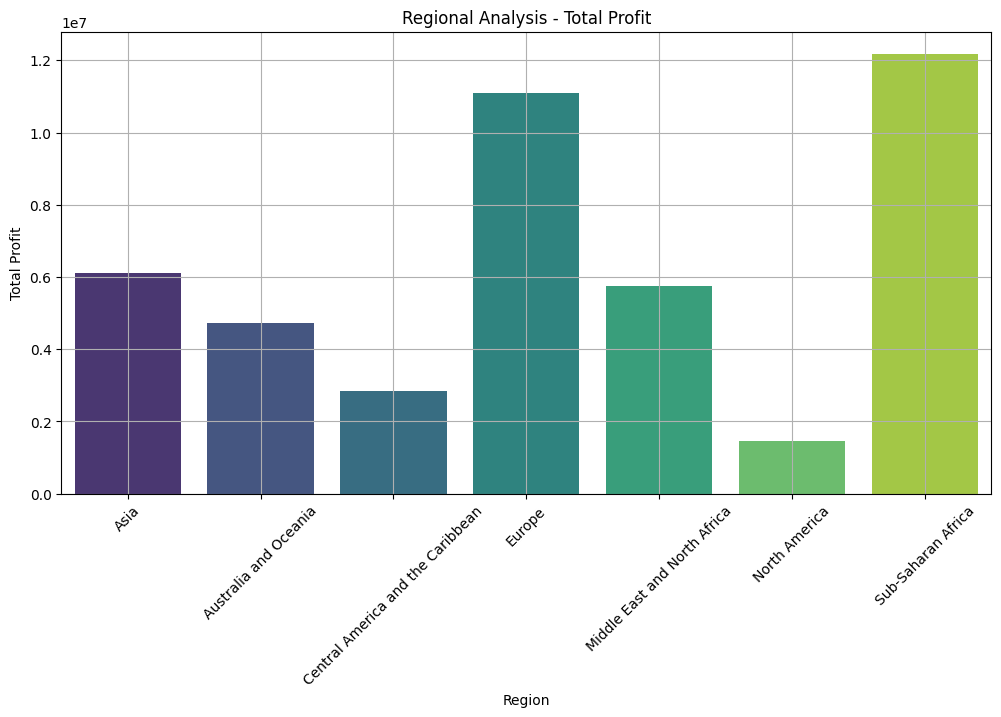

In [23]:
# Plot Regional Analysis 2
plt.figure(figsize=(12,6))
sns.barplot(data=region_analysis, x='Region', y='Total Profit', hue='Region', palette='viridis', dodge=False)
plt.title('Regional Analysis - Total Profit')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

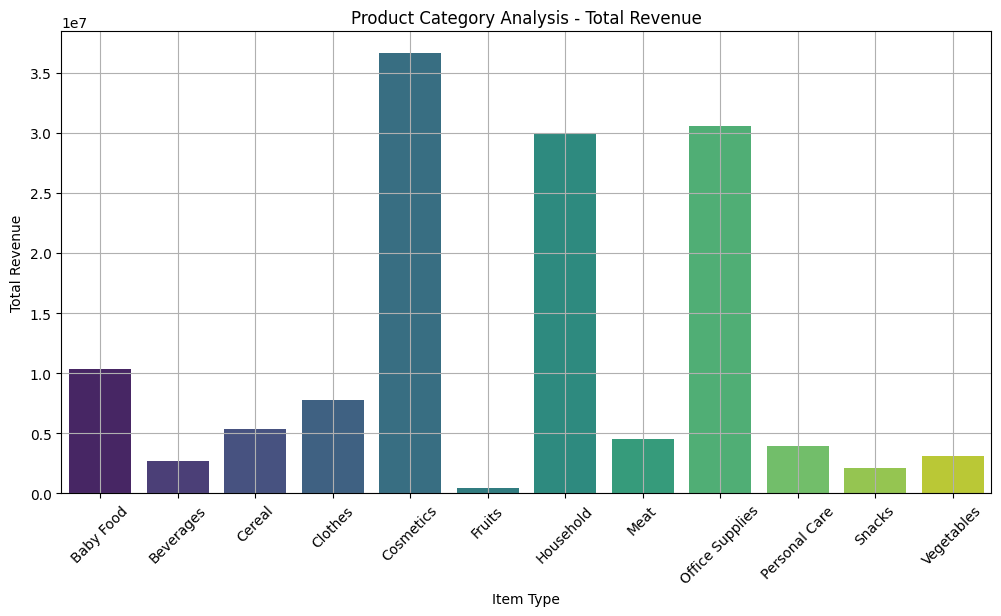

In [28]:
# Group by Item Type and Calculate Total Revenue and Total Profit
item_type_analysis=data.groupby('Item Type')[['Total Revenue','Total Profit']].sum().reset_index()

# Plot Regional Analysis 1(Total Revenue)
plt.figure(figsize=(12,6))
sns.barplot(data=item_type_analysis, x='Item Type', y='Total Revenue', hue='Item Type', palette='viridis', dodge=False)
plt.title('Product Category Analysis - Total Revenue')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

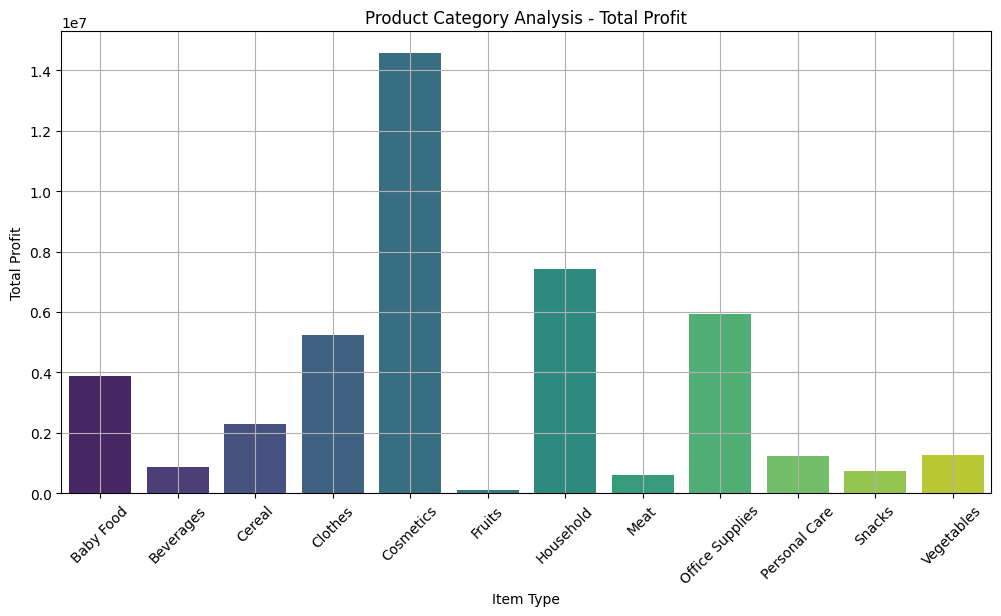

In [26]:
# Plot Regional Analysis 2(Total Profit)
plt.figure(figsize=(12,6))
sns.barplot(data=item_type_analysis, x='Item Type', y='Total Profit', hue='Item Type', palette='viridis', dodge=False)
plt.title('Product Category Analysis - Total Profit')
plt.xlabel('Item Type')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

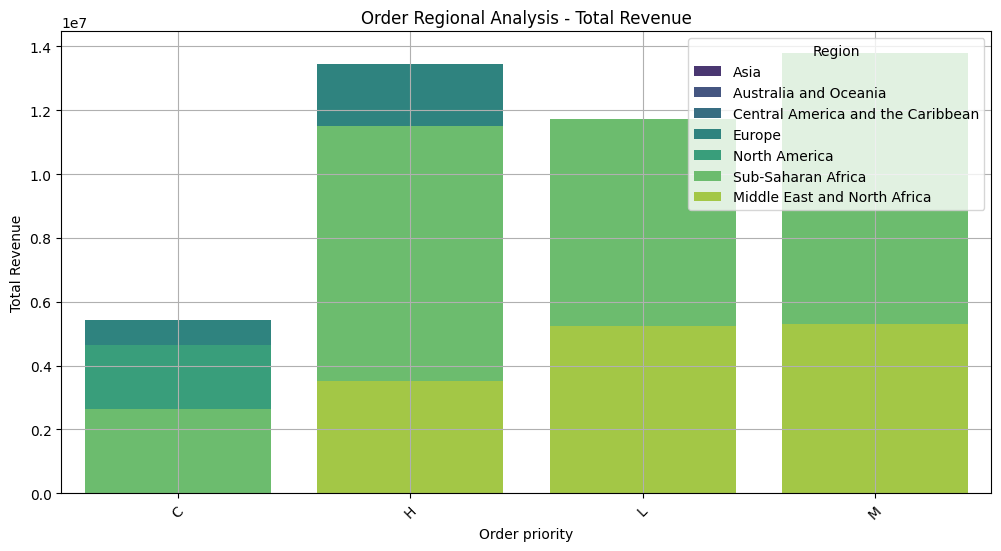

In [31]:
# Group by Order Priority and Calculate Total Revenue and Total Profit
order_priority_analysis=data.groupby(['Order Priority','Region'])[['Total Revenue','Total Profit']].sum().reset_index()

# Plot Order Regional Analysis-1(Total Revenue)
plt.figure(figsize=(12,6))
sns.barplot(data=order_priority_analysis, x='Order Priority', y='Total Revenue', hue='Region', palette='viridis', dodge=False)
plt.title('Order Regional Analysis - Total Revenue')
plt.xlabel('Order priority')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

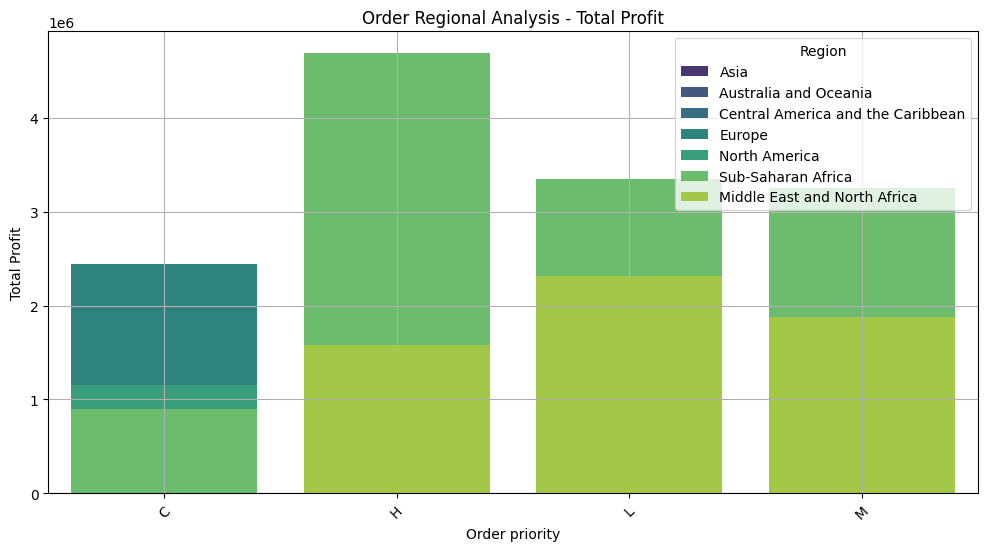

In [32]:
# Plot Order Regional Analysis-2(Total profit)
plt.figure(figsize=(12,6))
sns.barplot(data=order_priority_analysis, x='Order Priority', y='Total Profit', hue='Region', palette='viridis', dodge=False)
plt.title('Order Regional Analysis - Total Profit')
plt.xlabel('Order priority')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()